In [114]:
import pandas as pd
import numpy as np
import missingno as mno
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
colonnes_selectionnees = [
    # Identifiants et d√©mographie
    'ID',
    'Sexe',
    'Age',

    # Variables cliniques critiques
    'Cr√©atinine (mg/L)',
    'Ur√©e (g/L)',
    'Prot√©inurie',
    'Prot√©inurie √† la bandellette urinaire (g/24h)',
    'TA (mmHg)/Systole',
    'TA (mmHg)/Diastole',

    # Comorbidit√©s
    'Personnels M√©dicaux/HTA',
    'Personnels M√©dicaux/Diab√®te 1',
    'Personnels M√©dicaux/Diab√®te 2',
    'Personnels M√©dicaux/IRC',
    'Personnels M√©dicaux/Maladies Cardiovasculaire(Cardiopathie, AVC, preeclampsie)',

    # Sympt√¥mes cl√©s
    "Motif(s) d'Admission/≈íd√®me",
    'Sympt√¥mes/Oligurie',
    'Sympt√¥mes/Asth√©nie',
    'Sympt√¥mes/Naus√©es',
    'Sympt√¥mes/Vomissements',
    'Sympt√¥mes/Perte de poids',
    'Etat G√©n√©ral (EG)/OMI',

    # Anthropom√©trie
    'Poids (Kg)',
    'Taille (m)',
    'IMC',

    # Biologie
    'Hb (g/dL)',
    'Hte (%)',
    'Na^+ (meq/L)',
    'K^+ (meq/L)',
    'Ca^2+ (meq/L)',

    # Donn√©es √©chographiques
    'Grosseur Rein Gauche ',
    'Grosseur Rein Droit ',
    'Echog√©nicit√©',
    'Contour r√©gulier/Rein droit',
    'Contour r√©gulier/Rein gauche',

    # Stade IRC (si disponible)
    "Stage de l'IRC"
]


In [116]:
df_red=pd.read_csv("ai4ckd_red.csv")

In [117]:
df_red.head()

Unnamed: 0 ID Sexe Age Cr√©atinine (mg/L) Ur√©e (g/L) Prot√©inurie  \
0           0  1    F  50               169       1,29    N√©gative   
1           1  2    M  28                17       0,66          3+   
2           2  3    F  69                48       0,79    N√©gative   
3           3  4    M  68                42       1,14          3+   
4           4  5    F  68               500        NaN          3+   

  Prot√©inurie √† la bandellette urinaire (g/24h) TA (mmHg)/Systole  \
0                                           NaN               140   
1                                           NaN               130   
2                                           NaN                93   
3                                           NaN               130   
4                                           NaN               225   

  TA (mmHg)/Diastole  ... Hte (%) Na^+ (meq/L) K^+ (meq/L) Ca^2+ (meq/L)  \
0                 80  ...    32,4          131         6,4            82   
1                 80  ...    30,6          134         5,3           NaN   
2                 34  ...    28,1          139         3,4            87   
3                 70  ...    24,4          142         5,7            88   
4                111  ...    28,1          NaN         NaN           NaN   

  Grosseur Rein Gauche  Grosseur Rein Droit         Echog√©nicit√©  \
0                   NaN                  NaN                 NaN   
1                Normal               Normal  Hyper Echog√©nicit√©   
2                   NaN                  NaN                 NaN   
3                   NaN                  NaN                 NaN   
4                Normal               Normal         Homog√©n√©it√©   

  Contour r√©gulier/Rein droit Contour r√©gulier/Rein gauche Stage de l'IRC  
0                         NaN                          NaN          CKD 5  
1                         Oui                          Oui          CKD 5  
2                         NaN                          NaN          CKD 5  
3                         NaN                          NaN          CKD 5  
4                         Oui                          Oui          CKD 5  

[5 rows x 36 columns]

In [118]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 36 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Unnamed: 0                                                                      309 non-null    int64 
 1   ID                                                                              307 non-null    object
 2   Sexe                                                                            299 non-null    object
 3   Age                                                                             300 non-null    object
 4   Cr√©atinine (mg/L)                                                               307 non-null    object
 5   Ur√©e (g/L)                                                                      284 non-null    object
 6   Prot√©inurie            

In [119]:
df=df_red.copy()

In [120]:

#Standardisation noms de colonnes en minuscules sans espaces et en format string
columns=list()
for col in df.columns.to_list():
  columns.append(str(col).lower().strip())
df.columns=columns
df.columns





Index(['unnamed: 0', 'id', 'sexe', 'age', 'cr√©atinine (mg/l)', 'ur√©e (g/l)',
       'prot√©inurie', 'prot√©inurie √† la bandellette urinaire (g/24h)',
       'ta (mmhg)/systole', 'ta (mmhg)/diastole', 'personnels m√©dicaux/hta',
       'personnels m√©dicaux/diab√®te 1', 'personnels m√©dicaux/diab√®te 2',
       'personnels m√©dicaux/irc',
       'personnels m√©dicaux/maladies cardiovasculaire(cardiopathie, avc, preeclampsie)',
       'motif(s) d'admission/≈ìd√®me', 'sympt√¥mes/oligurie',
       'sympt√¥mes/asth√©nie', 'sympt√¥mes/naus√©es', 'sympt√¥mes/vomissements',
       'sympt√¥mes/perte de poids', 'etat g√©n√©ral (eg)/omi', 'poids (kg)',
       'taille (m)', 'imc', 'hb (g/dl)', 'hte (%)', 'na^+ (meq/l)',
       'k^+ (meq/l)', 'ca^2+ (meq/l)', 'grosseur rein gauche',
       'grosseur rein droit', 'echog√©nicit√©', 'contour r√©gulier/rein droit',
       'contour r√©gulier/rein gauche', 'stage de l'irc'],
      dtype='object')

In [121]:
df.drop(["id","unnamed: 0"],axis=1,inplace=True) # Suppression des colonnes id,unnamed

In [122]:
df["stage de l'irc"].value_counts()

stage de l'irc
CKD 5     60
CKD 2     52
CKD 4     50
CKD 3a    49
CKD 3b    49
CKD 1     46
0%         1
Name: count, dtype: int64

In [123]:
# Convertit le stade de l'IRC en entier (1-5) si un chiffre est pr√©sent, sinon retourne NaN
def stage_to_int(stage):
  if "1" in str(stage):
    return int(1)
  elif "2" in str(stage):
    return int(2)
  elif "3" in str(stage):
    return int(3)
  elif "4" in str(stage):
    return int(4)
  elif "5" in str(stage):
    return int(5)
  else:
    return np.nan

df["stage de l'irc"] = df["stage de l'irc"].apply(stage_to_int)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 34 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   sexe                                                                            299 non-null    object 
 1   age                                                                             300 non-null    object 
 2   cr√©atinine (mg/l)                                                               307 non-null    object 
 3   ur√©e (g/l)                                                                      284 non-null    object 
 4   prot√©inurie                                                                     62 non-null     object 
 5   prot√©inurie √† la bandellette urinaire (g/24h)                                   66 non-null     object 
 6   ta (mmhg)/sys

In [125]:
df["imc"].value_counts()

imc
Normal            54
Obese             39
Overweight        33
Extremly Obese     7
Underweight        4
55%                1
Name: count, dtype: int64

In [126]:
df["ur√©e (g/l)"]

0      1,29
1      0,66
2      0,79
3      1,14
4       NaN
       ... 
304    0,49
305     NaN
306     NaN
307     NaN
308      7%
Name: ur√©e (g/l), Length: 309, dtype: object

In [127]:
#CONVERSION des donn√©es numeriques en format adequat
colonnes_numeriques = ['age', 'cr√©atinine (mg/l)', 'ur√©e (g/l)',
                      'ta (mmhg)/systole', 'ta (mmhg)/diastole',
                      'poids (kg)', 'taille (m)','hb (g/dl)', 'hte (%)',
                      'na^+ (meq/l)', 'k^+ (meq/l)', 'ca^2+ (meq/l)']

for col in colonnes_numeriques:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [128]:
# Mapping de la colonne prot√©inurie en valeurs num√©riques
mapping_proteinurie = {
    'N√©gatif': 0,
    'Trace': 0.5,
    '1+': 1,
    '2+': 2,
    '3+': 3,
    '> 3+': 4
}

df['prot√©inurie'] = df['prot√©inurie'].map(mapping_proteinurie)

In [129]:
# Convertir en valeurs continues approximatives (point milieu de l'intervalle)
mapping_valeurs_centrales = {
    '<=1': 0.5,   # Centre approximatif de l'intervalle 0-1
    ']1;2]': 1.5, # Centre de l'intervalle 1-2
    ']2;3]': 2.5, # Centre de l'intervalle 2-3
    '>3': 4.0     # Valeur repr√©sentative pour >3
}

df['prot√©inurie √† la bandellette urinaire (g/24h)'] = df['prot√©inurie √† la bandellette urinaire (g/24h)'].map(mapping_valeurs_centrales)

Traitement des valeurs manquantes

<Axes: >

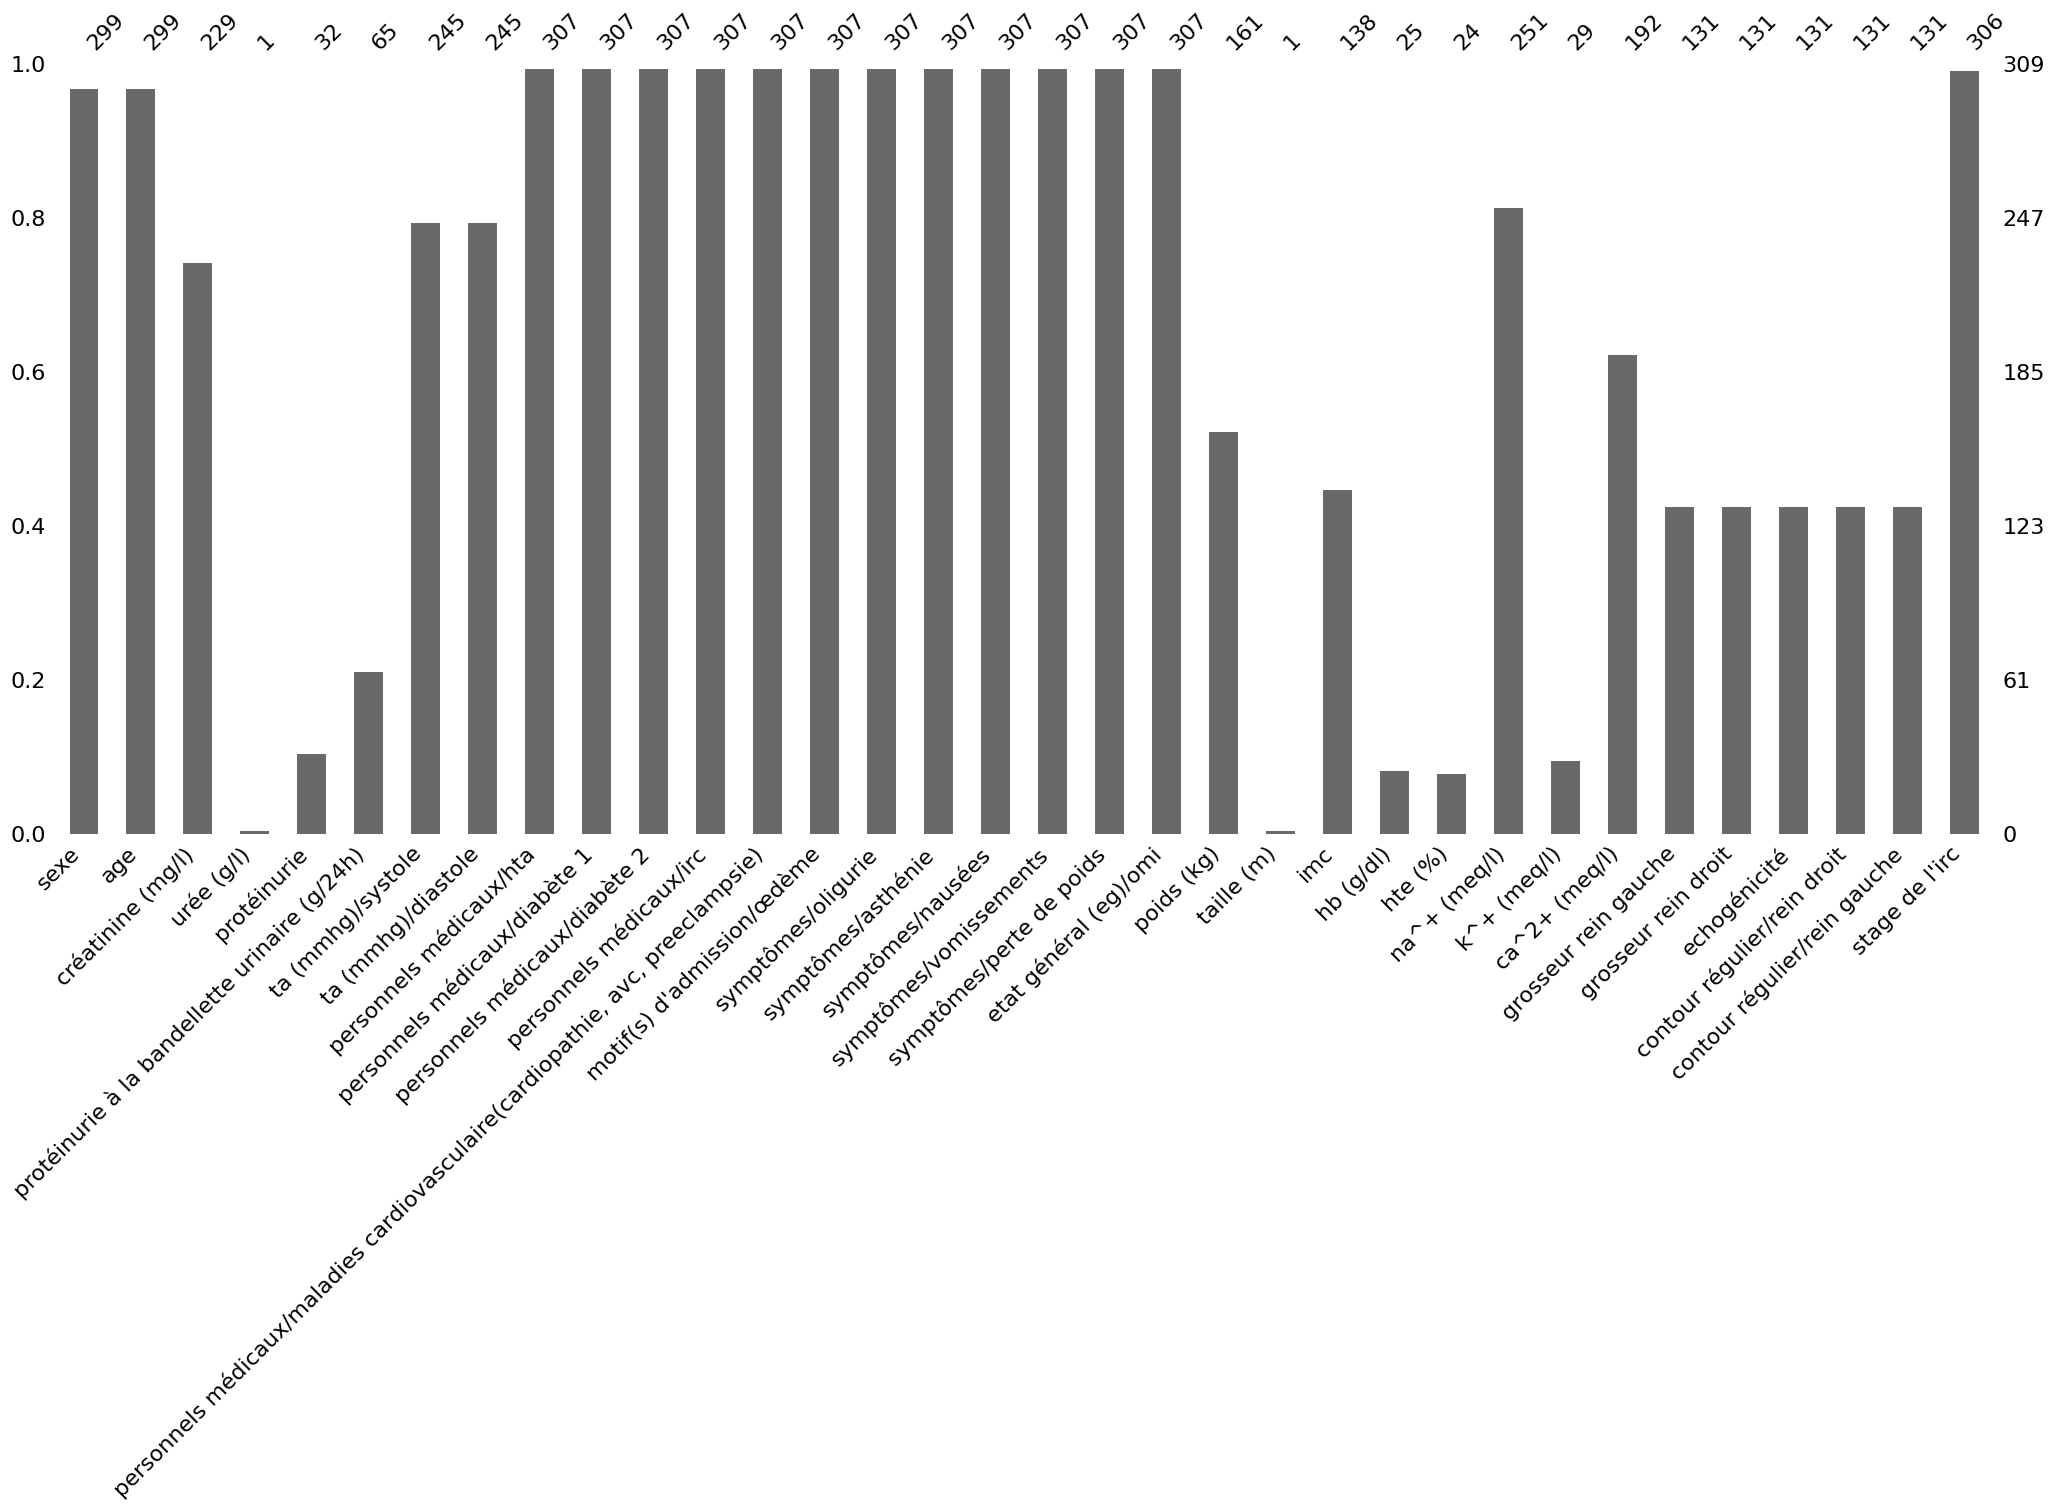

In [130]:
mno.bar(df)

 ## L‚Äôimputation de colonnes ['ur√©e (g/l)', 'taille (m)', 'poids (kg)','prot√©inurie √† la bandellette urinaire (g/24h)',"prot√©inurie","hb (g/dl)","hte (%)","k^+ (meq/l)"] representant des variables normalement diagnostiqu√©es par des tests de laboratoire est une d√©cision critique.Deplus ces colonnes ne contiennent pas assez de donn√©es repesentative pour imputer.

In [131]:
df.drop(['ur√©e (g/l)', 'taille (m)', 'poids (kg)','prot√©inurie √† la bandellette urinaire (g/24h)',"prot√©inurie","hb (g/dl)","hte (%)","k^+ (meq/l)"], axis=1, inplace=True)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 26 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   sexe                                                                            299 non-null    object 
 1   age                                                                             299 non-null    float64
 2   cr√©atinine (mg/l)                                                               229 non-null    float64
 3   ta (mmhg)/systole                                                               245 non-null    float64
 4   ta (mmhg)/diastole                                                              245 non-null    float64
 5   personnels m√©dicaux/hta                                                         307 non-null    object 
 6   personnels m√©di

In [133]:
# Imputation des valeurs manquantes par type de variable
for col in df.select_dtypes(include="object").columns:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Variables cat√©gorielles : mode

for col in ["age", "stage de l'irc"]:
    df[col].fillna(df[col].median(), inplace=True)  # Variables ordinales : m√©diane

num_cols = ['cr√©atinine (mg/l)', 'ta (mmhg)/systole', 'ta (mmhg)/diastole',
            'na^+ (meq/l)', 'ca^2+ (meq/l)']
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)  # Variables num√©riques continues : moyenne

<ipython-input-133-3a46bba844e7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)  # Variables cat√©gorielles : mode
<ipython-input-133-3a46bba844e7>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [134]:
df.isna().sum()

sexe                                                                              0
age                                                                               0
cr√©atinine (mg/l)                                                                 0
ta (mmhg)/systole                                                                 0
ta (mmhg)/diastole                                                                0
personnels m√©dicaux/hta                                                           0
personnels m√©dicaux/diab√®te 1                                                     0
personnels m√©dicaux/diab√®te 2                                                     0
personnels m√©dicaux/irc                                                           0
personnels m√©dicaux/maladies cardiovasculaire(cardiopathie, avc, preeclampsie)    0
motif(s) d'admission/≈ìd√®me                                                        0
sympt√¥mes/oligurie                                                                0
sympt√¥mes/asth√©nie                                                                0
sympt√¥mes/naus√©es                                                                 0
sympt√¥mes/vomissements                                                            0
sympt√¥mes/perte de poids                                                          0
etat g√©n√©ral (eg)/omi                                                             0
imc                                                                               0
na^+ (meq/l)                                                                      0
ca^2+ (meq/l)                                                                     0
grosseur rein gauche                                                              0
grosseur rein droit                                                               0
echog√©nicit√©                                                                      0
contour r√©gulier/rein droit                                                       0
contour r√©gulier/rein gauche                                                      0
stage de l'irc                                                                    0
dtype: int64

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 26 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   sexe                                                                            309 non-null    object 
 1   age                                                                             309 non-null    float64
 2   cr√©atinine (mg/l)                                                               309 non-null    float64
 3   ta (mmhg)/systole                                                               309 non-null    float64
 4   ta (mmhg)/diastole                                                              309 non-null    float64
 5   personnels m√©dicaux/hta                                                         309 non-null    object 
 6   personnels m√©di

In [136]:
colonnes_contenant_3 = df.columns[df.isin(["3%"]).any()]

# Supprimer les lignes contenant "3%" dans ces colonnes
df = df[~df[colonnes_contenant_3].isin(["3%"]).any(axis=1)]

# Taux de creantine VS Stade de l'IRC

In [137]:
# Fonction pour d√©tecter et traiter les valeurs aberrantes dans les colonnes num√©riques
def traiter_valeurs_aberrantes(df, columns, method='cap'):
    df_processed = df.copy()

    for column in columns:
        if column in df.columns and df[column].dtype in ['float64', 'float32', 'int64', 'int32']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            if method == 'cap':
                # Plafonner les valeurs aberrantes
                df_processed[column] = df_processed[column].clip(lower=lower_bound, upper=upper_bound)
            elif method == 'nan':
                # Convertir les valeurs aberrantes en NaN (pour imputation ult√©rieure)
                mask = (df_processed[column] < lower_bound) | (df_processed[column] > upper_bound)
                df_processed.loc[mask, column] = np.nan

    return df_processed

In [138]:
df=traiter_valeurs_aberrantes(df, columns=["cr√©atinine (mg/l)","ta (mmhg)/systole","ta (mmhg)/diastole"], method='cap')

In [139]:
df["cr√©atinine (mg/l)"].max()

99.8886462882096

# FEATURES ENGINEERING

## Calculer le D√©bit de filtration glom√©rulaire estim√© (DFGe)
### √âquation de la cr√©atinine du MRC-EPI (2009)

### Il s'agit de la m√©thode principale et la plus recommand√©e. Elle utilise un seul r√©sultat d'analyse de sang pour la cr√©atinine.

### DFGe = 141 √ó min(SCr/k, 1)Œ± √ó max(SCr/k, 1)-1,209 √ó 0,993 √¢ge √ó a √ó b

### o√π :

### Œ± ‚Äì coefficient d√©pendant du sexe : -0,329 pour les femmes, -0,411 pour les hommes
### k ‚Äì coefficient d√©pendant du sexe : 0,7 pour les femmes, 0,9 pour les hommes
### a ‚Äì coefficient d√©pendant du sexe : 1,018 pour les femmes, 1 pour les hommes
### b ‚Äì coefficient d√©pendant de l'ethnicit√© : 1,159 pour les individus d'origine africaine, 1 pour les autres
### SCr ‚Äì niveau de cr√©atinine s√©rique standardis√©e en mg‚ãÖdL‚Åª¬π

In [140]:
df.dropna(axis=0,inplace=True)

In [141]:
def calculer_dfge(df, race_noire=True):
    """
    Calcule le D√©bit de Filtration Glom√©rulaire estim√© (DFGe) selon la formule CKD-EPI
    pour chaque ligne d'un DataFrame pandas.

    Param√®tres:
    df (pandas.DataFrame): DataFrame contenant les colonnes 'age', 'sexe' et 'cr√©atinine (mg/l)'
    race_noire (bool): True si le patient est de race noire, False sinon

    Retourne:
    pandas.Series: S√©rie contenant les valeurs de DFGe calcul√©es pour chaque ligne
    """

    # Extraction des colonnes
    age = df['age']
    sexe = df['sexe']
    creatinine = df['cr√©atinine (mg/l)']

    # Conversion de mg/L en mg/dL (division par 10)
    creatinine_mg_dl = creatinine / 10

    # Cr√©ation des arrays pour les param√®tres qui varient selon le sexe
    k = np.where(sexe.str.upper() == 'F', 0.7, 0.9)
    alpha = np.where(sexe.str.upper() == 'F', -0.329, -0.411)
    a = np.where(sexe.str.upper() == 'F', 1.018, 1.0)

    # Facteur de correction pour la race noire
    b = 1.159 if race_noire else 1.0

    # Calcul vectoris√© des termes
    ratio = creatinine_mg_dl / k
    min_term = np.power(np.minimum(ratio, 1), alpha)
    max_term = np.power(np.maximum(ratio, 1), -1.209)
    age_factor = np.power(0.993, age)

    # Calcul final du DFGe
    dfge = 141 * min_term * max_term * age_factor * a * b

    return dfge.round(2)

In [142]:
df['dfge'] = calculer_dfge(df)

In [143]:
df.head()

sexe   age  cr√©atinine (mg/l)  ta (mmhg)/systole  ta (mmhg)/diastole  \
0    F  50.0          99.888646            140.000              80.000   
1    M  28.0          17.000000            130.000              80.000   
2    F  69.0          48.000000             93.000              52.875   
3    M  68.0          42.000000            130.000              70.000   
4    F  68.0          99.888646            184.875             111.000   

  personnels m√©dicaux/hta personnels m√©dicaux/diab√®te 1  \
0                       1                             0   
1                       0                             0   
2                       1                             0   
3                       0                             0   
4                       1                             0   

  personnels m√©dicaux/diab√®te 2 personnels m√©dicaux/irc  \
0                             0                       1   
1                             0                       0   
2                             1                       1   
3                             0                       0   
4                             0                       1   

  personnels m√©dicaux/maladies cardiovasculaire(cardiopathie, avc, preeclampsie)  \
0                                                  0                               
1                                                  0                               
2                                                  0                               
3                                                  0                               
4                                                  0                               

   ...     imc na^+ (meq/l) ca^2+ (meq/l) grosseur rein gauche  \
0  ...  Normal   131.000000     82.000000               Normal   
1  ...  Normal   134.000000     91.942708               Normal   
2  ...  Normal   139.000000     87.000000               Normal   
3  ...  Normal   142.000000     88.000000               Normal   
4  ...  Normal   138.083665     91.942708               Normal   

  grosseur rein droit        echog√©nicit√© contour r√©gulier/rein droit  \
0              Normal         Homog√©n√©it√©                         Oui   
1              Normal  Hyper Echog√©nicit√©                         Oui   
2              Normal         Homog√©n√©it√©                         Oui   
3              Normal         Homog√©n√©it√©                         Oui   
4              Normal         Homog√©n√©it√©                         Oui   

  contour r√©gulier/rein gauche  stage de l'irc   dfge  
0                          Oui             5.0   4.71  
1                          Oui             5.0  62.22  
2                          Oui             5.0   9.99  
3                          Oui             5.0  15.74  
4                          Oui             5.0   4.15  

[5 rows x 27 columns]

Text(0.5, 1.0, "Taux de creantine VS Stade de l'IRC")

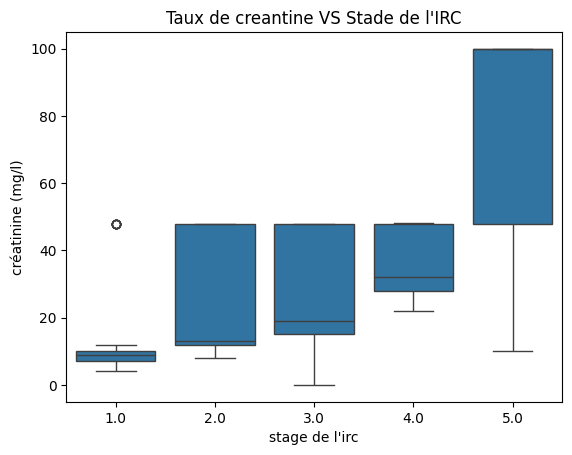

In [144]:
# Create the boxplot and get the Axes object
ax = sns.boxplot(x="stage de l'irc", y='cr√©atinine (mg/l)', data=df)

# Set the title using the Axes object
ax.set_title("Taux de creantine VS Stade de l'IRC")

<Axes: xlabel="stage de l'irc", ylabel='dfge'>

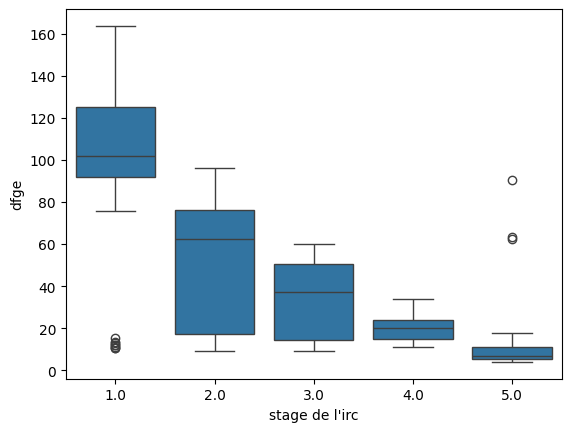

In [145]:
sns.boxplot(y="dfge", x="stage de l'irc", data=df)

In [146]:
df.dfge

0       4.71
1      62.22
2       9.99
3      15.74
4       4.15
       ...  
303    45.27
304    54.92
305    46.15
306    14.56
307    14.56
Name: dfge, Length: 308, dtype: float64

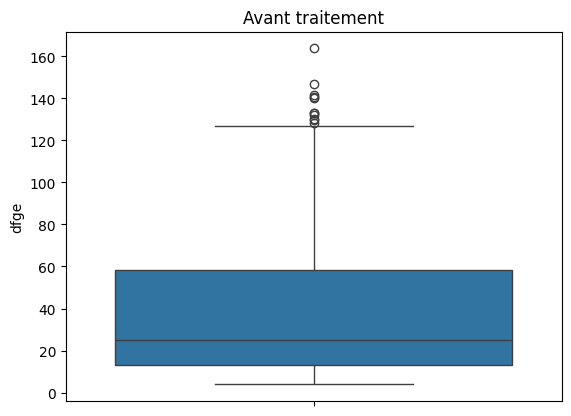

In [147]:
plt.title('Avant traitement')
ax=sns.boxplot(df['dfge'])

In [148]:
# gestion des valeurs aberrantes de la colonnes calcul√© (dfge)
df=traiter_valeurs_aberrantes(df, columns=["dfge"], method='cap')

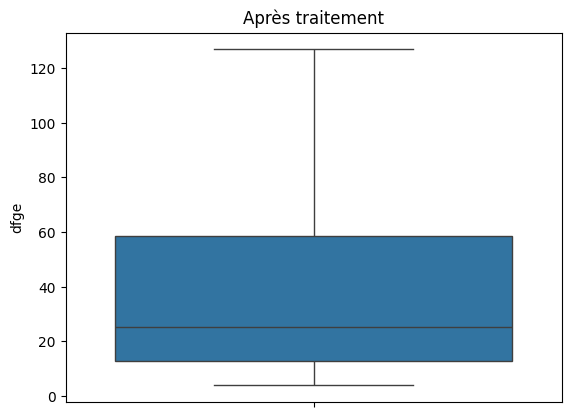

In [149]:
plt.title('Apr√®s traitement')
ax=sns.boxplot(df['dfge'])

# Statistique descriptive sur les colonnes

In [150]:
categorical_columns=df.select_dtypes(include="object").columns.to_list()
numerical_columns=df.select_dtypes(exclude="object").columns.to_list()

print(categorical_columns)

['sexe', 'personnels m√©dicaux/hta', 'personnels m√©dicaux/diab√®te 1', 'personnels m√©dicaux/diab√®te 2', 'personnels m√©dicaux/irc', 'personnels m√©dicaux/maladies cardiovasculaire(cardiopathie, avc, preeclampsie)', "motif(s) d'admission/≈ìd√®me", 'sympt√¥mes/oligurie', 'sympt√¥mes/asth√©nie', 'sympt√¥mes/naus√©es', 'sympt√¥mes/vomissements', 'sympt√¥mes/perte de poids', 'etat g√©n√©ral (eg)/omi', 'imc', 'grosseur rein gauche', 'grosseur rein droit', 'echog√©nicit√©', 'contour r√©gulier/rein droit', 'contour r√©gulier/rein gauche']


In [151]:
df[categorical_columns].describe()

sexe personnels m√©dicaux/hta personnels m√©dicaux/diab√®te 1  \
count   308                     308                           308   
unique    2                       2                             2   
top       M                       1                             0   
freq    160                     242                           303   

       personnels m√©dicaux/diab√®te 2 personnels m√©dicaux/irc  \
count                            308                     308   
unique                             2                       2   
top                                0                       0   
freq                             214                     279   

       personnels m√©dicaux/maladies cardiovasculaire(cardiopathie, avc, preeclampsie)  \
count                                                 308                               
unique                                                  2                               
top                                                     0                               
freq                                                  274                               

       motif(s) d'admission/≈ìd√®me sympt√¥mes/oligurie sympt√¥mes/asth√©nie  \
count                         308                308                308   
unique                          2                  2                  2   
top                             0                  0                  0   
freq                          279                292                220   

       sympt√¥mes/naus√©es sympt√¥mes/vomissements sympt√¥mes/perte de poids  \
count                308                    308                      308   
unique                 2                      2                        2   
top                    0                      0                        0   
freq                 290                    262                      297   

       etat g√©n√©ral (eg)/omi     imc grosseur rein gauche grosseur rein droit  \
count                    308     308                  308                 308   
unique                     2       5                    3                   3   
top                        0  Normal               Normal              Normal   
freq                     207     225                  267                 269   

       echog√©nicit√© contour r√©gulier/rein droit contour r√©gulier/rein gauche  
count           308                         308                          308  
unique            3                           2                            2  
top     Homog√©n√©it√©                         Oui                          Oui  
freq            277                         305                          307

In [152]:
df[numerical_columns].describe()

age  cr√©atinine (mg/l)  ta (mmhg)/systole  ta (mmhg)/diastole  \
count  308.000000         308.000000         308.000000          308.000000   
mean    54.753247          36.060625         139.798493           83.279557   
std     14.824846          28.696279          22.366753           14.843078   
min     18.000000           0.000000          91.875000           52.875000   
25%     44.750000          13.000000         126.750000           75.750000   
50%     57.000000          27.000000         138.391837           82.130612   
75%     66.000000          47.755459         150.000000           91.000000   
max     88.000000          99.888646         184.875000          113.875000   

       na^+ (meq/l)  ca^2+ (meq/l)  stage de l'irc        dfge  
count    308.000000     308.000000      308.000000  308.000000  
mean     138.083665      91.942708        3.084416   39.820195  
std        6.938361       6.634813        1.306218   34.657240  
min       60.000000      62.000000        1.000000    3.950000  
25%      138.000000      89.000000        2.000000   12.987500  
50%      139.000000      91.942708        3.000000   25.190000  
75%      141.000000      95.000000        4.000000   58.527500  
max      148.000000     120.000000        5.000000  126.837500

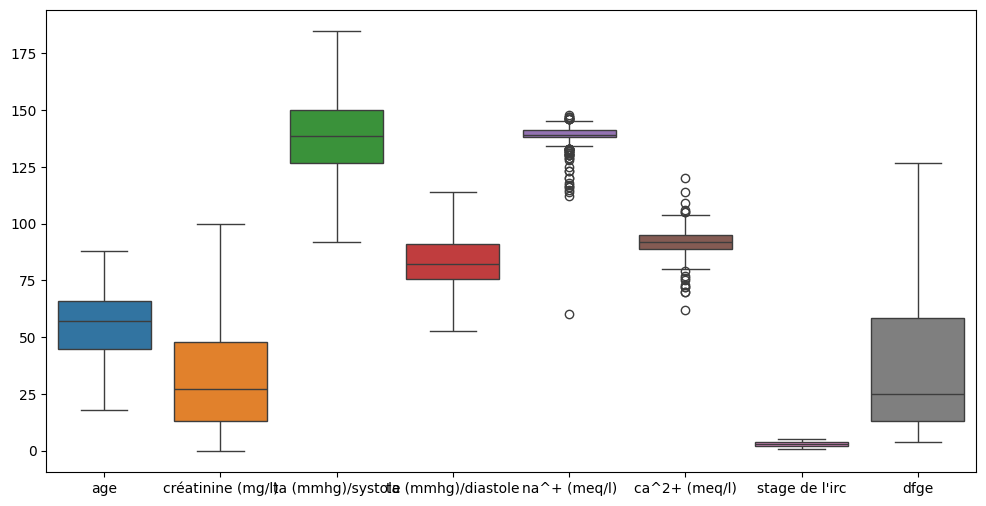

In [153]:
# V√©rification des valeurs aberrantes
plt.figure(figsize=(12, 6))
ax=sns.boxplot(df[numerical_columns])


# Etude de relation entre les colonnes quantitatives

### Methode avec la matrice de corr√©lation

In [154]:
df[numerical_columns].corr()

age  cr√©atinine (mg/l)  ta (mmhg)/systole  \
age                 1.000000          -0.238438           0.013561   
cr√©atinine (mg/l)  -0.238438           1.000000           0.181308   
ta (mmhg)/systole   0.013561           0.181308           1.000000   
ta (mmhg)/diastole -0.183807           0.212251           0.747282   
na^+ (meq/l)        0.172576          -0.397909          -0.017553   
ca^2+ (meq/l)       0.198875          -0.353587          -0.112186   
stage de l'irc     -0.061496           0.689068           0.233869   
dfge               -0.068344          -0.740616          -0.165476   

                    ta (mmhg)/diastole  na^+ (meq/l)  ca^2+ (meq/l)  \
age                          -0.183807      0.172576       0.198875   
cr√©atinine (mg/l)             0.212251     -0.397909      -0.353587   
ta (mmhg)/systole             0.747282     -0.017553      -0.112186   
ta (mmhg)/diastole            1.000000      0.027918      -0.098339   
na^+ (meq/l)                  0.027918      1.000000       0.200381   
ca^2+ (meq/l)                -0.098339      0.200381       1.000000   
stage de l'irc                0.179931     -0.275400      -0.344269   
dfge                         -0.126043      0.213589       0.240102   

                    stage de l'irc      dfge  
age                      -0.061496 -0.068344  
cr√©atinine (mg/l)         0.689068 -0.740616  
ta (mmhg)/systole         0.233869 -0.165476  
ta (mmhg)/diastole        0.179931 -0.126043  
na^+ (meq/l)             -0.275400  0.213589  
ca^2+ (meq/l)            -0.344269  0.240102  
stage de l'irc            1.000000 -0.717581  
dfge                     -0.717581  1.000000

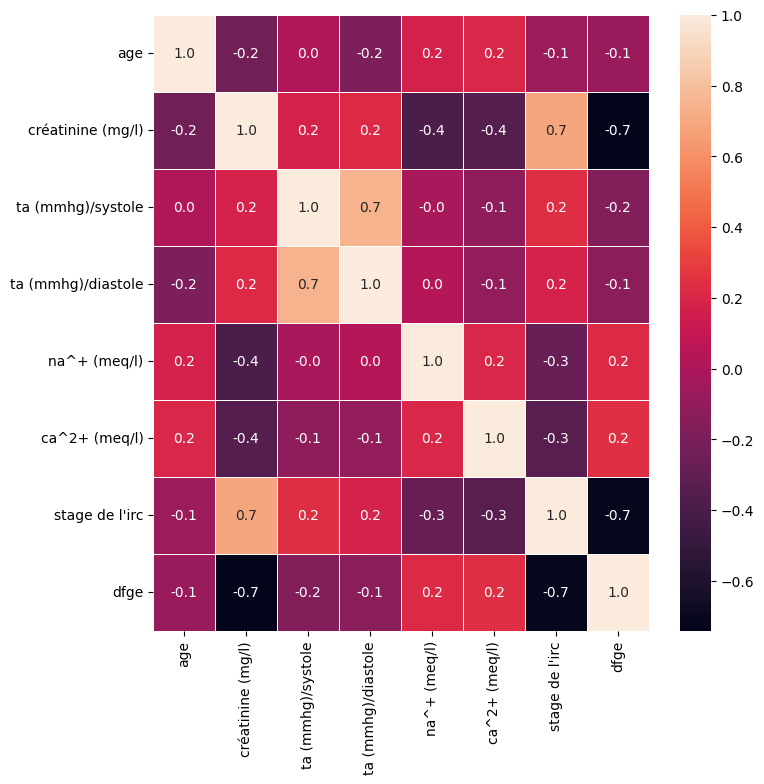

In [155]:
#correlation map
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

##  Corr√©lations avec la variable cible : `stage de l'irc`

| Variable                | Corr√©lation avec le stade de l‚ÄôIRC | Interpr√©tation |
|------------------------|-------------------------------------|----------------|
| **Cr√©atinine (mg/l)**  | **+0.7**                            | Tr√®s forte corr√©lation positive : plus la cr√©atinine augmente, plus le stade de l‚ÄôIRC est avanc√©. Excellent pr√©dicteur. |
| **DFG (dfge)**          | **-0.7**                            | Corr√©lation n√©gative tr√®s forte : plus le DFG diminue, plus le stade est avanc√©. Indicateur clinique majeur. |
| **Na‚Å∫ (meq/l)**         | -0.3                                | Corr√©lation n√©gative mod√©r√©e. Une baisse de sodium peut accompagner la progression de l‚ÄôIRC. |
| **Ca¬≤‚Å∫ (meq/l)**        | -0.3                                | M√™me logique que le sodium : l‚Äôhypocalc√©mie est fr√©quente dans les stades avanc√©s. |
| **TA (systole/diastole)** | +0.2                            | Corr√©lation faible : l‚Äôhypertension est un facteur de risque et une cons√©quence. |
| **√Çge**                 | -0.1                                | Corr√©lation faible et peu significative. |

---

##  Corr√©lations entre variables explicatives (multicolin√©arit√©)

| Variables corr√©l√©es               | Corr√©lation | Remarques |
|----------------------------------|-------------|-----------|
| Cr√©atinine - DFG                 | **-0.7**    | Attendu, car le DFG est calcul√© √† partir de la cr√©atinine. |
| TA systolique - TA diastolique  | **+0.7**    | Forte association naturelle entre les deux mesures. |
| Autres (√©lectrolytes, √¢ge, etc.) | < ¬±0.4      | Pas de forte redondance, mais attention au cumul. |

>  **√Ä noter** : En cas d‚Äôutilisation de mod√®les sensibles √† la colin√©arit√© (ex : r√©gression lin√©aire), il faudra faire attention √† ne pas inclure simultan√©ment des variables tr√®s corr√©l√©es comme `cr√©atinine` et `dfge`.

---

# Etude de relation entre les colonnes qualitatives

In [156]:
for col in categorical_columns:
  print(col,":",df[col].unique())

sexe : ['F' 'M']
personnels m√©dicaux/hta : ['1' '0']
personnels m√©dicaux/diab√®te 1 : ['0' '1']
personnels m√©dicaux/diab√®te 2 : ['0' '1']
personnels m√©dicaux/irc : ['1' '0']
personnels m√©dicaux/maladies cardiovasculaire(cardiopathie, avc, preeclampsie) : ['0' '1']
motif(s) d'admission/≈ìd√®me : ['0' '1']
sympt√¥mes/oligurie : ['0' '1']
sympt√¥mes/asth√©nie : ['0' '1']
sympt√¥mes/naus√©es : ['0' '1']
sympt√¥mes/vomissements : ['0' '1']
sympt√¥mes/perte de poids : ['0' '1']
etat g√©n√©ral (eg)/omi : ['0' '1']
imc : ['Normal' 'Underweight' 'Obese' 'Overweight' 'Extremly Obese']
grosseur rein gauche : ['Normal' 'Augment√©' 'R√©duit']
grosseur rein droit : ['Normal' 'Augment√©' 'R√©duit']
echog√©nicit√© : ['Homog√©n√©it√©' 'Hyper Echog√©nicit√©' 'Hypo Echog√©nicit√©']
contour r√©gulier/rein droit : ['Oui' 'Non']
contour r√©gulier/rein gauche : ['Oui' 'Non']


### Analyser les relations entre LES variables cat√©gorielles et la variable cible (stage de l'IRC)

In [157]:
for col in categorical_columns:
  print(col,":",df[col].unique())

sexe : ['F' 'M']
personnels m√©dicaux/hta : ['1' '0']
personnels m√©dicaux/diab√®te 1 : ['0' '1']
personnels m√©dicaux/diab√®te 2 : ['0' '1']
personnels m√©dicaux/irc : ['1' '0']
personnels m√©dicaux/maladies cardiovasculaire(cardiopathie, avc, preeclampsie) : ['0' '1']
motif(s) d'admission/≈ìd√®me : ['0' '1']
sympt√¥mes/oligurie : ['0' '1']
sympt√¥mes/asth√©nie : ['0' '1']
sympt√¥mes/naus√©es : ['0' '1']
sympt√¥mes/vomissements : ['0' '1']
sympt√¥mes/perte de poids : ['0' '1']
etat g√©n√©ral (eg)/omi : ['0' '1']
imc : ['Normal' 'Underweight' 'Obese' 'Overweight' 'Extremly Obese']
grosseur rein gauche : ['Normal' 'Augment√©' 'R√©duit']
grosseur rein droit : ['Normal' 'Augment√©' 'R√©duit']
echog√©nicit√© : ['Homog√©n√©it√©' 'Hyper Echog√©nicit√©' 'Hypo Echog√©nicit√©']
contour r√©gulier/rein droit : ['Oui' 'Non']
contour r√©gulier/rein gauche : ['Oui' 'Non']


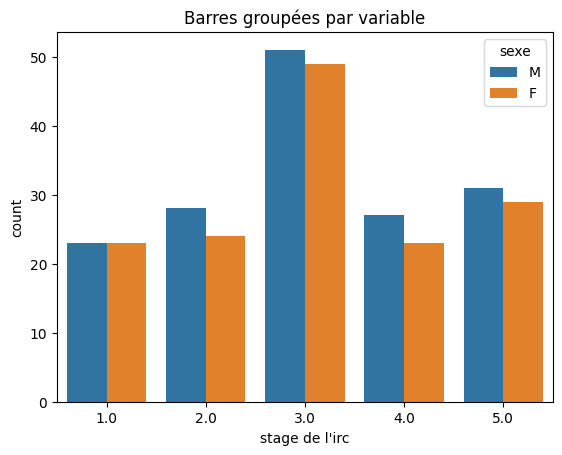

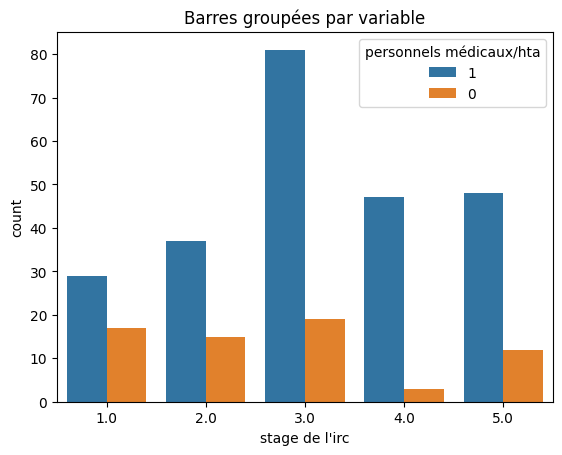

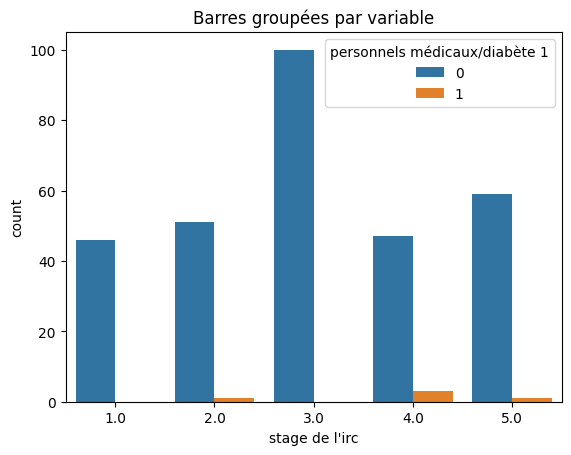

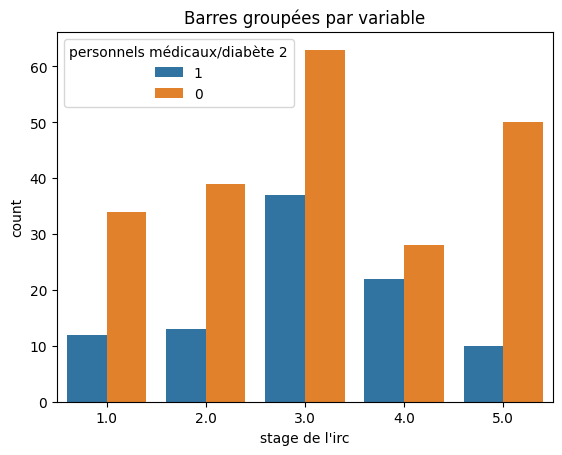

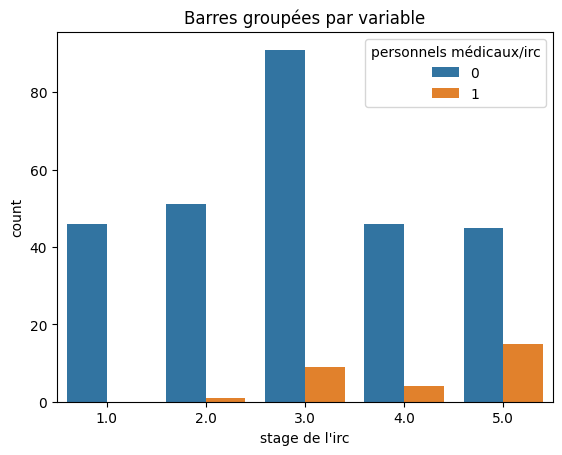

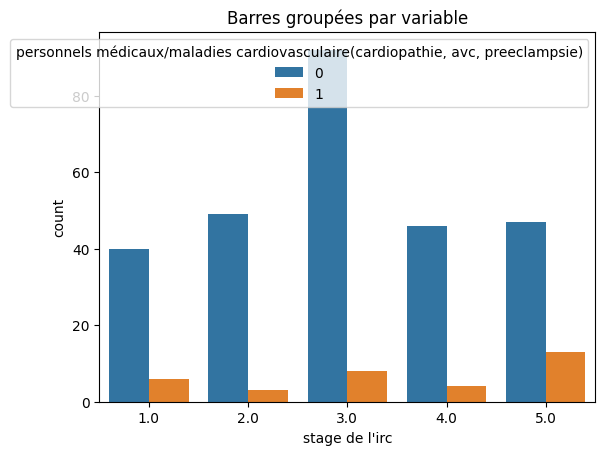

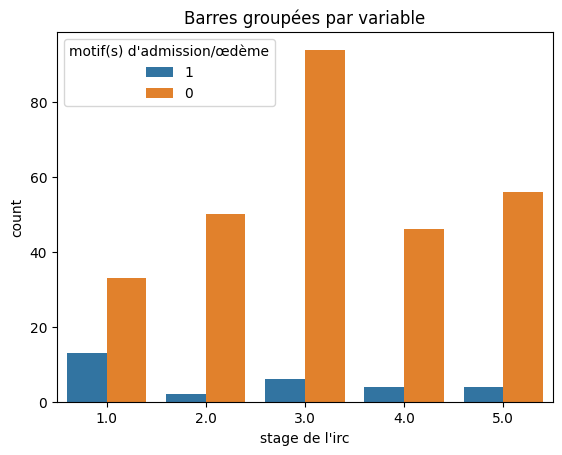

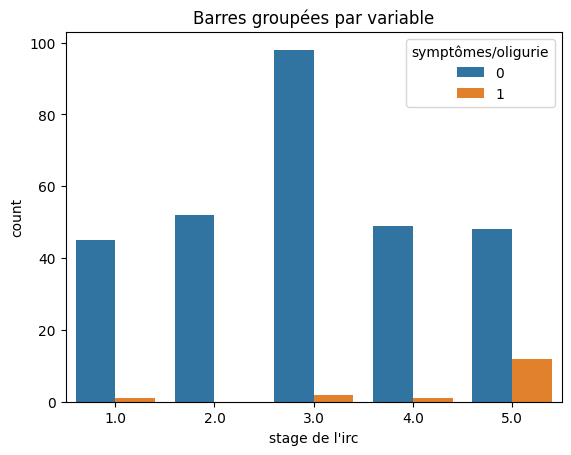

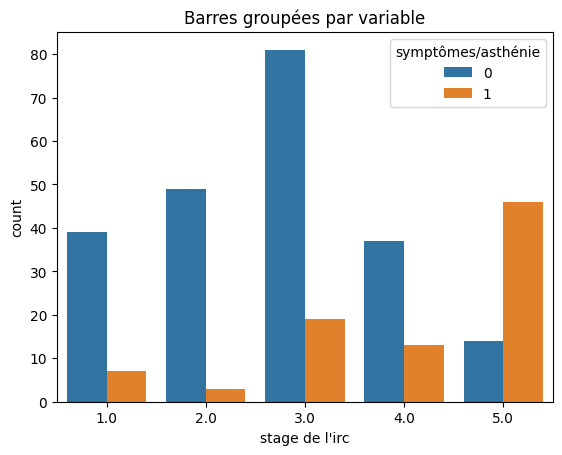

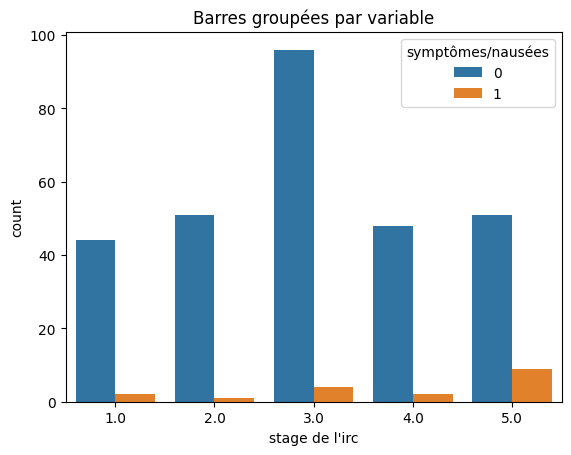

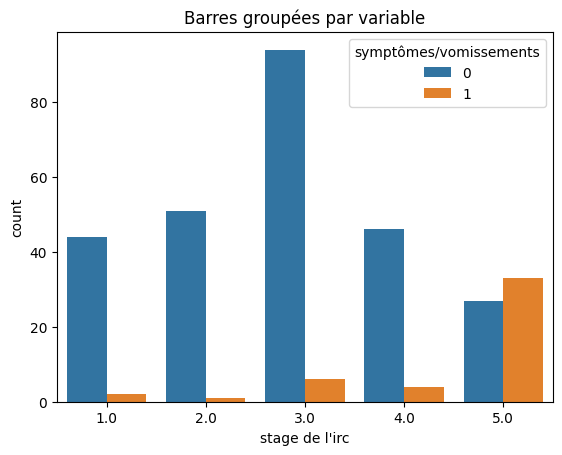

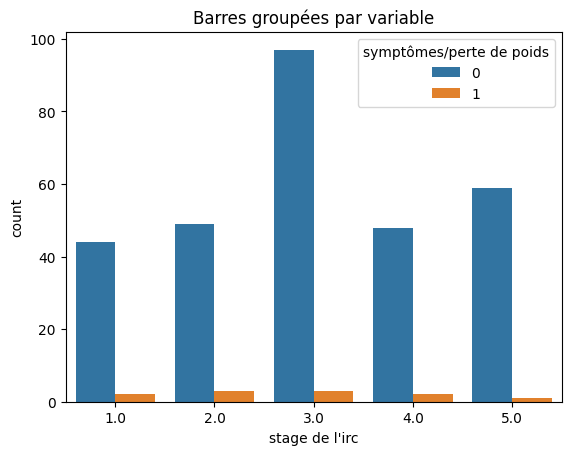

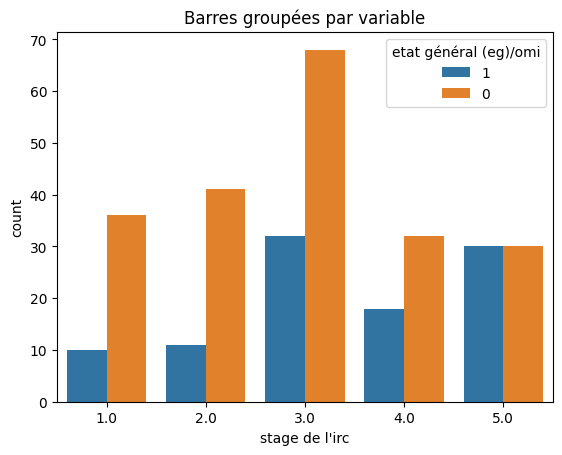

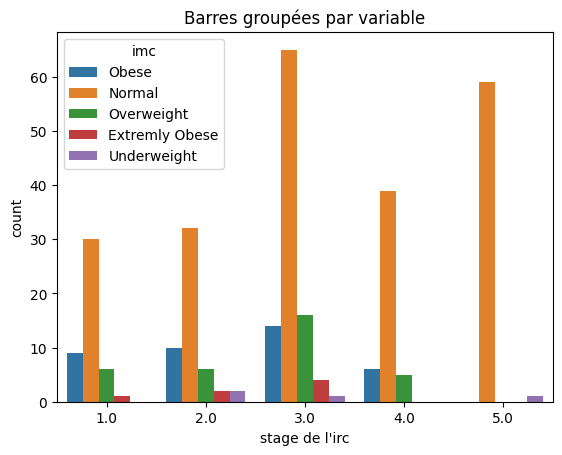

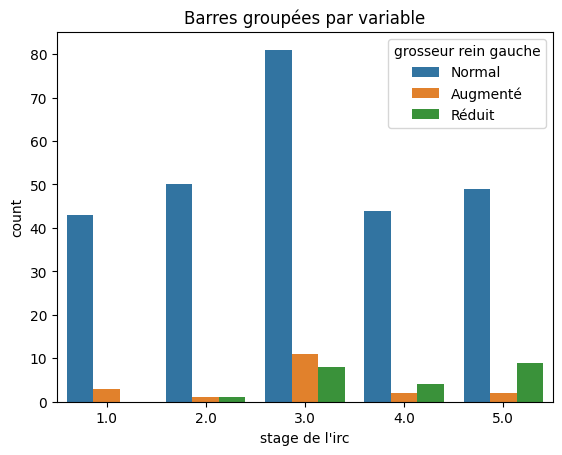

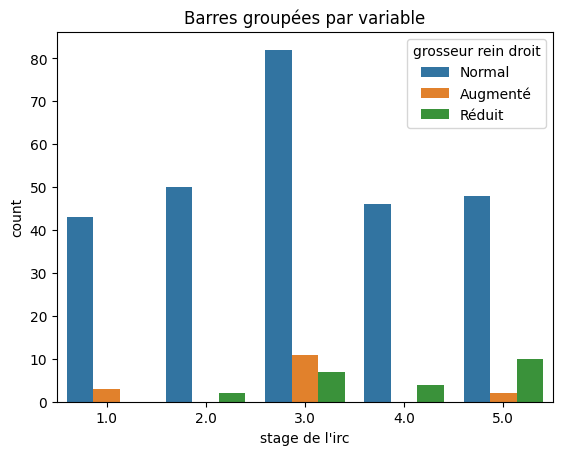

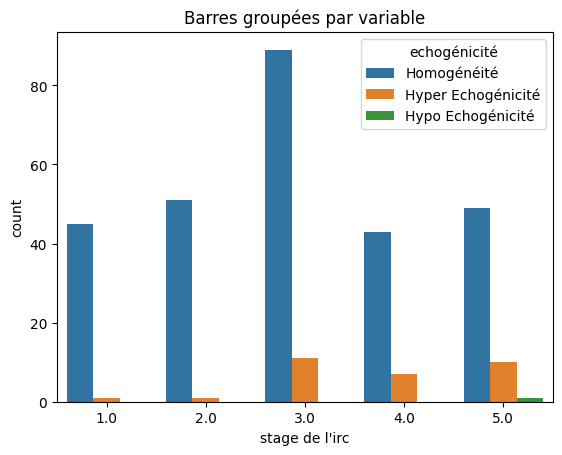

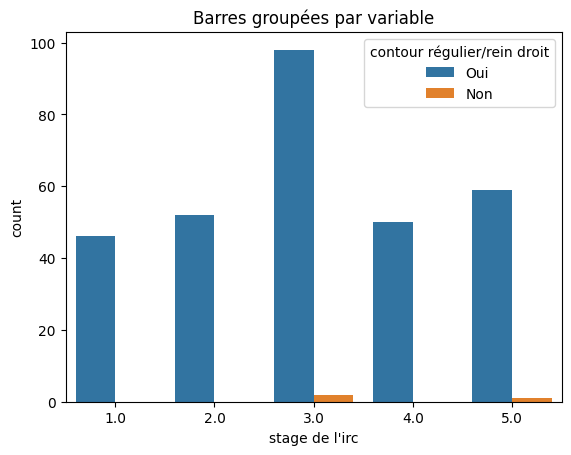

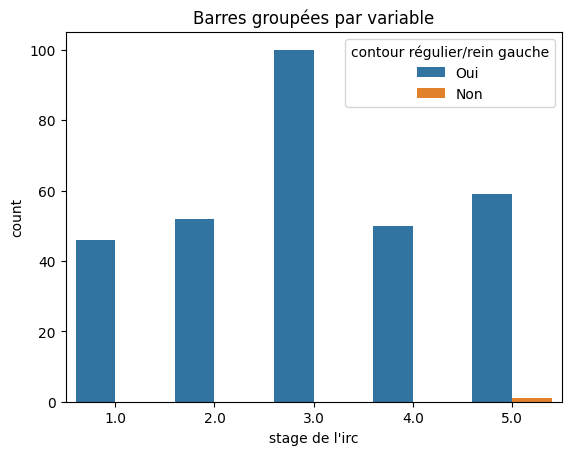

In [158]:
for col in categorical_columns:
    # Check if column exists in DataFrame before plotting
    if col in df.columns:
        sns.countplot(data=df, x="stage de l'irc", hue=col)
        plt.title("Barres group√©es par variable")
        plt.show()
    else:
        print(f"Column '{col}' not found in DataFrame, skipping plot.")

#### Principales observations issues de cette phase d'exploration.


1.   La cr√©atinine et le DFGe sont fortement corr√©l√©s avec le stade de l'IRC,indiquant leur importance en tant que pr√©dicteurs.
2.  Des sympt√¥mes tels que l'asth√©nie, les vomissements et l'oligurie sont significativement associ√©s au stade de l'IRC.
3.   Des ant√©c√©dents d'IRC et d'hypertension art√©rielle (HTA) sont √©galement des facteurs de risque importants.
significativement associ√©s au stade de l'IRC.
4. Le sexe, la perte de poids et la r√©gularit√© des contours r√©naux ne montrent pas d'associations significatives.


Numerisation des colonnes categorielles

In [159]:
for col in categorical_columns:
  print(col,":",df[col].unique())

sexe : ['F' 'M']
personnels m√©dicaux/hta : ['1' '0']
personnels m√©dicaux/diab√®te 1 : ['0' '1']
personnels m√©dicaux/diab√®te 2 : ['0' '1']
personnels m√©dicaux/irc : ['1' '0']
personnels m√©dicaux/maladies cardiovasculaire(cardiopathie, avc, preeclampsie) : ['0' '1']
motif(s) d'admission/≈ìd√®me : ['0' '1']
sympt√¥mes/oligurie : ['0' '1']
sympt√¥mes/asth√©nie : ['0' '1']
sympt√¥mes/naus√©es : ['0' '1']
sympt√¥mes/vomissements : ['0' '1']
sympt√¥mes/perte de poids : ['0' '1']
etat g√©n√©ral (eg)/omi : ['0' '1']
imc : ['Normal' 'Underweight' 'Obese' 'Overweight' 'Extremly Obese']
grosseur rein gauche : ['Normal' 'Augment√©' 'R√©duit']
grosseur rein droit : ['Normal' 'Augment√©' 'R√©duit']
echog√©nicit√© : ['Homog√©n√©it√©' 'Hyper Echog√©nicit√©' 'Hypo Echog√©nicit√©']
contour r√©gulier/rein droit : ['Oui' 'Non']
contour r√©gulier/rein gauche : ['Oui' 'Non']


In [160]:
# Convertir les variables binaires (0 ou 1)
binary_cols = [
    'personnels m√©dicaux/hta', 'personnels m√©dicaux/diab√®te 1', 'personnels m√©dicaux/diab√®te 2',
    'personnels m√©dicaux/irc', 'personnels m√©dicaux/maladies cardiovasculaire(cardiopathie, avc, preeclampsie)',
    'motif(s) d\'admission/≈ìd√®me', 'sympt√¥mes/oligurie', 'sympt√¥mes/asth√©nie',
    'sympt√¥mes/naus√©es', 'sympt√¥mes/vomissements', 'sympt√¥mes/perte de poids', 'etat g√©n√©ral (eg)/omi'
]
df[binary_cols] = df[binary_cols].astype(int)

# Encodage ordinal pour imc
imc_mapping = {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3, 'Extremly Obese': 4}
df['imc'] = df['imc'].map(imc_mapping)

In [161]:
# Encodage ordinal pour la grosseur des reins
size_mapping = {'R√©duit': 0, 'Normal': 1, 'Augment√©': 2}
df['grosseur rein gauche'] = df['grosseur rein gauche'].map(size_mapping)
df['grosseur rein droit'] = df['grosseur rein droit'].map(size_mapping)

# Encodage ordinal pour l'√©chog√©nicit√©
echogenicity_mapping = {'Hypo Echog√©nicit√©': 0, 'Homog√©n√©it√©': 1, 'Hyper Echog√©nicit√©': 2}
df['echog√©nicit√©'] = df['echog√©nicit√©'].map(echogenicity_mapping)

# Encodage One-Hot pour le sexe et le contour r√©gulier
df = pd.get_dummies(df, columns=['sexe', 'contour r√©gulier/rein droit', 'contour r√©gulier/rein gauche'], drop_first=True)
df["age"]=df["age"].astype(int)
#  Afficher le DataFrame transform√©

In [162]:
df.head(10)

age  cr√©atinine (mg/l)  ta (mmhg)/systole  ta (mmhg)/diastole  \
0   50          99.888646            140.000              80.000   
1   28          17.000000            130.000              80.000   
2   69          48.000000             93.000              52.875   
3   68          42.000000            130.000              70.000   
4   68          99.888646            184.875             111.000   
5   58          99.888646            150.000              80.000   
6   48          47.755459            108.000              63.000   
7   41          99.888646            184.875             113.875   
8   42          99.888646            169.000             111.000   
9   55          93.000000            110.000              60.000   

   personnels m√©dicaux/hta  personnels m√©dicaux/diab√®te 1  \
0                        1                              0   
1                        0                              0   
2                        1                              0   
3                        0                              0   
4                        1                              0   
5                        1                              0   
6                        1                              0   
7                        0                              0   
8                        1                              0   
9                        1                              0   

   personnels m√©dicaux/diab√®te 2  personnels m√©dicaux/irc  \
0                              0                        1   
1                              0                        0   
2                              1                        1   
3                              0                        0   
4                              0                        1   
5                              1                        0   
6                              1                        0   
7                              1                        1   
8                              0                        0   
9                              1                        0   

   personnels m√©dicaux/maladies cardiovasculaire(cardiopathie, avc, preeclampsie)  \
0                                                  0                                
1                                                  0                                
2                                                  0                                
3                                                  0                                
4                                                  0                                
5                                                  1                                
6                                                  0                                
7                                                  0                                
8                                                  1                                
9                                                  0                                

   motif(s) d'admission/≈ìd√®me  ...  na^+ (meq/l)  ca^2+ (meq/l)  \
0                           0  ...    131.000000      82.000000   
1                           0  ...    134.000000      91.942708   
2                           0  ...    139.000000      87.000000   
3                           1  ...    142.000000      88.000000   
4                           0  ...    138.083665      91.942708   
5                           0  ...    130.000000      91.942708   
6                           0  ...    138.083665      91.942708   
7                           0  ...    140.000000      87.000000   
8                           0  ...    141.000000      88.000000   
9                           0  ...    123.000000      85.000000   

   grosseur rein gauche  grosseur rein droit  echog√©nicit√©  stage de l'irc  \
0                     1                    1             1             5.0   
1                     1                    1             2          

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 307
Data columns (total 27 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   age                                                                             308 non-null    int64  
 1   cr√©atinine (mg/l)                                                               308 non-null    float64
 2   ta (mmhg)/systole                                                               308 non-null    float64
 3   ta (mmhg)/diastole                                                              308 non-null    float64
 4   personnels m√©dicaux/hta                                                         308 non-null    int64  
 5   personnels m√©dicaux/diab√®te 1                                                   308 non-null    int64  
 6   personnels m√©dicau

In [164]:

# Renommage des colonnes
df.columns = [
    "age", "creatinine", "ta_systole", "ta_diastole",
    "personnels_medicaux_hta", "personnels_medicaux_diabete_1", "personnels_medicaux_diabete_2",
    "personnels_medicaux_irc", "personnels_medicaux_maladies_cardiovasculaires",
    "motif_admission_oedeme", "symptomes_oligurie", "symptomes_asthenie",
    "symptomes_nausees", "symptomes_vomissements", "symptomes_perte_poids",
    "etat_general_omi", "imc", "na", "ca",
    "grosseur_rein_gauche", "grosseur_rein_droit", "echogenicite",
    "stage_irc", "dfge", "sexe_M",
    "contour_regulier_rein_droit", "contour_regulier_rein_gauche"
]


Variables essentielles :

dfge (D√©bit de filtration glom√©rulaire estim√©) : Excellent indicateur de la fonction r√©nale, fortement corr√©l√© n√©gativement au stade de l‚ÄôIRC.
cr√©atinine (mg/l) : Indicateur cl√© de la fonction r√©nale, fortement corr√©l√© positivement au stade de l‚ÄôIRC.
Variables cliniques et sympt√¥mes :

sympt√¥mes/asth√©nie : L‚Äôasth√©nie est un sympt√¥me fr√©quent de l‚ÄôIRC, associ√© de mani√®re significative au stade.
sympt√¥mes/vomissements : Les vomissements peuvent √™tre un signe de complications de l‚ÄôIRC, indiquant une possible aggravation.
sympt√¥mes/oligurie : La diminution du volume urinaire (oligurie) est un sympt√¥me caract√©ristique de l‚ÄôIRC.
motif(s) d'admission/≈ìd√®me : Les ≈ìd√®mes sont fr√©quents dans l‚ÄôIRC et peuvent refl√©ter la s√©v√©rit√© de la maladie.
Ant√©c√©dents m√©dicaux :

personnels m√©dicaux/irc : Des ant√©c√©dents d‚ÄôIRC sont un facteur de risque majeur de progression de la maladie.
personnels m√©dicaux/hta : L‚Äôhypertension art√©rielle est √† la fois une cause et une cons√©quence de l‚ÄôIRC, il est donc pertinent de la prendre en compte.
Variables biologiques et √©chographiques :

ca^2+ (meq/l) : Le taux de calcium peut √™tre perturb√© dans l‚ÄôIRC, une hypocalc√©mie √©tant fr√©quente dans les stades avanc√©s.
na^+ (meq/l) : Le taux de sodium peut √©galement √™tre affect√© dans l‚ÄôIRC, une hyponatr√©mie pouvant survenir dans les stades avanc√©s.
grosseur rein droit : La taille des reins peut √™tre modifi√©e par l‚ÄôIRC, notamment une r√©duction de la taille.
grosseur rein gauche : Idem que pour le rein droit.
imc (Indice de masse corporelle) : L‚ÄôIMC peut √™tre un indicateur de la sant√© g√©n√©rale et peut √™tre li√© √† des complications de l‚ÄôIRC.
Justification du choix :

Forte corr√©lation avec le stade de l‚ÄôIRC : Les variables dfge et cr√©atinine (mg/l) sont les plus importantes car elles refl√®tent directement la fonction r√©nale.
Importance clinique : Les sympt√¥mes, les ant√©c√©dents m√©dicaux et les variables biologiques/√©chographiques s√©lectionn√©s sont connus pour √™tre associ√©s √† l‚ÄôIRC et √† sa progression.
R√©sultats de vos analyses : Vous avez observ√© des associations significatives entre ces variables et le stade de l‚ÄôIRC dans vos analyses exploratoires.

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [173]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# üìå 1. S√©parer les features (X) et la target (y)
target_col = "stage_irc"  # Modifier selon la colonne cible
X = df.drop(columns=[target_col])
y = df[target_col]

# üìå 2. Normalisation des variables num√©riques
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = Pipeline(steps=[
    ("scaler", StandardScaler())  # Normalisation
])

# üèóÔ∏è 3. Pipeline avec XGBoost
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5,
                                 objective="binary:logistic", random_state=42))
])

# üìå 4. S√©paration des donn√©es en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train - 1
y_test = y_test - 1

model_pipeline.fit(X_train, y_train)
# üìä 6. √âvaluation du mod√®le
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"üéØ Pr√©cision du mod√®le : {accuracy:.2%}")
print(classification_report(y_test, y_pred))


üéØ Pr√©cision du mod√®le : 74.19%
              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75        12
         1.0       0.60      0.55      0.57        11
         2.0       0.76      0.76      0.76        21
         3.0       0.75      1.00      0.86         6
         4.0       0.82      0.75      0.78        12

    accuracy                           0.74        62
   macro avg       0.74      0.76      0.74        62
weighted avg       0.74      0.74      0.74        62



In [169]:
df.columns

Index(['age', 'creatinine', 'ta_systole', 'ta_diastole',
       'personnels_medicaux_hta', 'personnels_medicaux_diabete_1',
       'personnels_medicaux_diabete_2', 'personnels_medicaux_irc',
       'personnels_medicaux_maladies_cardiovasculaires',
       'motif_admission_oedeme', 'symptomes_oligurie', 'symptomes_asthenie',
       'symptomes_nausees', 'symptomes_vomissements', 'symptomes_perte_poids',
       'etat_general_omi', 'imc', 'na', 'ca', 'grosseur_rein_gauche',
       'grosseur_rein_droit', 'echogenicite', 'stage_irc', 'dfge', 'sexe_M',
       'contour_regulier_rein_droit', 'contour_regulier_rein_gauche'],
      dtype='object')

In [174]:
from sklearn.model_selection import cross_val_score

# üìå 1. S√©parer les features (X) et la target (y)
target_col = "stage_irc"  # Modifier selon la colonne cible
X = df.drop(columns=[target_col, "ta_diastole", "age", "sexe_M"])
y = df[target_col]

# üìå 2. Normalisation des variables num√©riques
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = Pipeline(steps=[
    ("scaler", StandardScaler())  # Normalisation
])

# üèóÔ∏è 3. Pipeline avec XGBoost
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5,
                                 objective="binary:logistic", random_state=42))
])

# üìå 4. Cross-validation (validation crois√©e)
cv_scores = cross_val_score(model_pipeline, X, y - 1, cv=5, scoring='accuracy')  # On utilise `cv=5` pour 5-fold cross-validation

# üéØ R√©sultats de la validation crois√©e
print(f"üéØ Scores de la validation crois√©e : {cv_scores}")
print(f"üéØ Pr√©cision moyenne : {cv_scores.mean():.2%}")


üéØ Scores de la validation crois√©e : [0.61290323 0.77419355 0.70967742 0.73770492 0.78688525]
üéØ Pr√©cision moyenne : 72.43%


In [175]:
print(df["stage_irc"].value_counts())


stage_irc
3.0    100
5.0     60
2.0     52
4.0     50
1.0     46
Name: count, dtype: int64


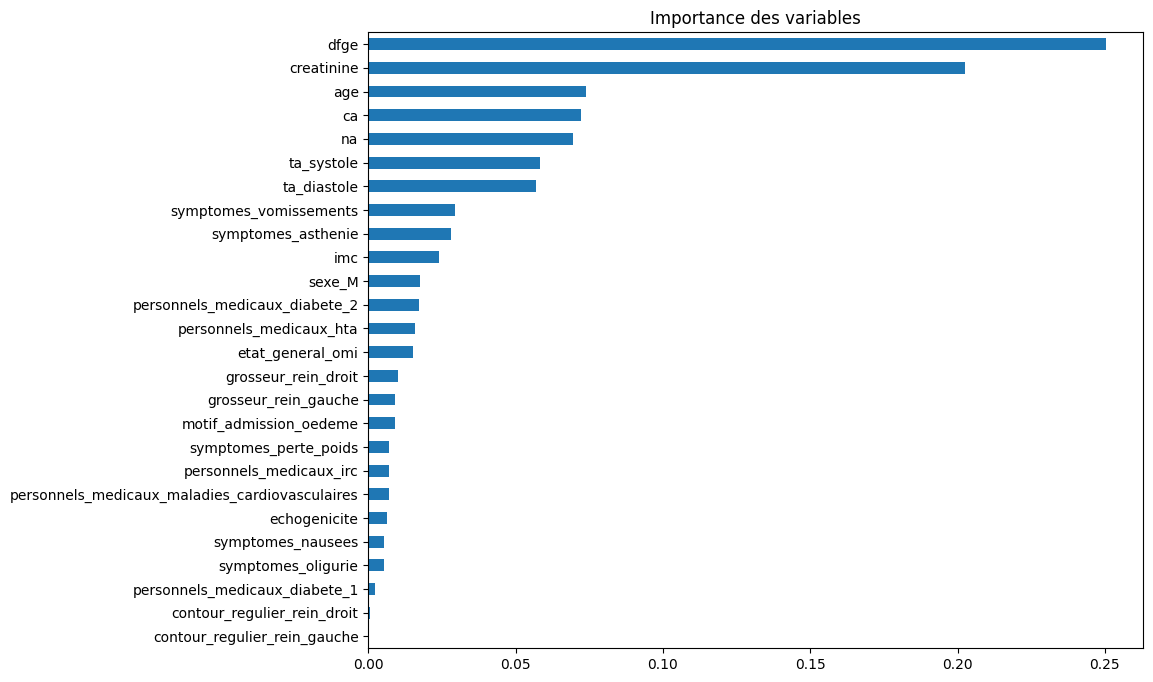

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Exemple : supposer que 'stage de l\'irc' est la variable cible
X = df.drop(columns=["stage_irc"])
y = df["stage_irc"]

# Pour un mod√®le de classification : binarisation possible ou cat√©gorisation des stades
y = y.astype(int)  # ou autre transformation logique

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Importance des variables
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='barh', figsize=(10,8))
plt.title("Importance des variables")
plt.gca().invert_yaxis()
plt.show()


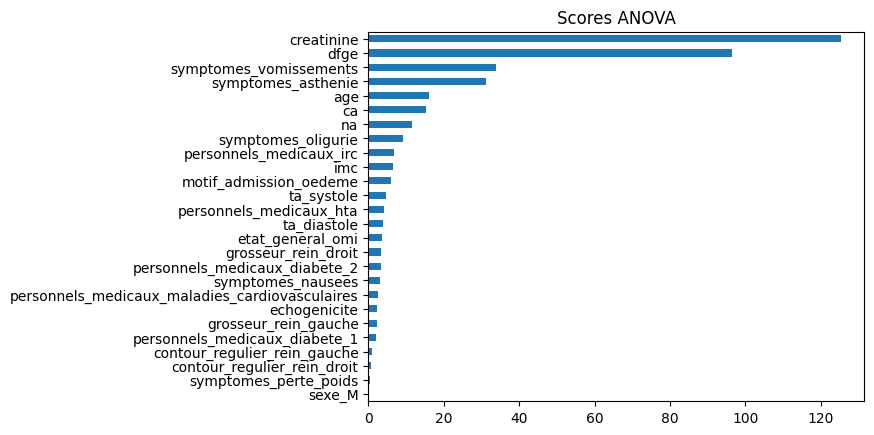

In [179]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Voir les scores
scores = pd.Series(selector.scores_, index=X.columns)
scores.sort_values(ascending=False).plot(kind='barh')
plt.title("Scores ANOVA")
plt.gca().invert_yaxis()
plt.show()


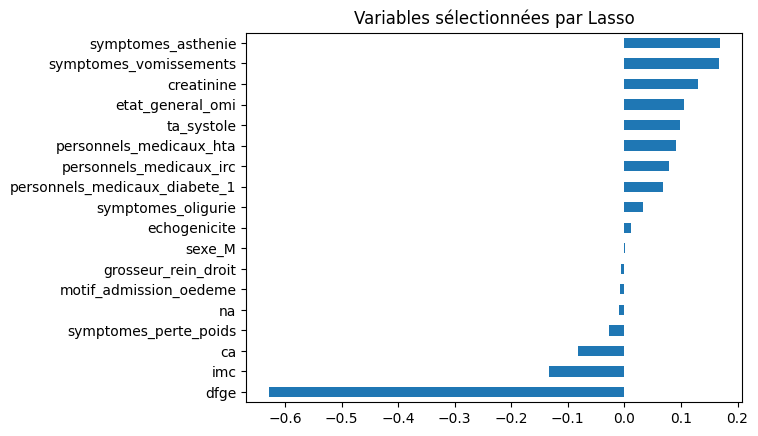

In [180]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = LassoCV(cv=5)
lasso.fit(X_scaled, y)

coef = pd.Series(lasso.coef_, index=X.columns)
coef[coef != 0].sort_values().plot(kind="barh")
plt.title("Variables s√©lectionn√©es par Lasso")
plt.show()


In [183]:
df.columns

Index(['age', 'creatinine', 'ta_systole', 'ta_diastole',
       'personnels_medicaux_hta', 'personnels_medicaux_diabete_1',
       'personnels_medicaux_diabete_2', 'personnels_medicaux_irc',
       'personnels_medicaux_maladies_cardiovasculaires',
       'motif_admission_oedeme', 'symptomes_oligurie', 'symptomes_asthenie',
       'symptomes_nausees', 'symptomes_vomissements', 'symptomes_perte_poids',
       'etat_general_omi', 'imc', 'na', 'ca', 'grosseur_rein_gauche',
       'grosseur_rein_droit', 'echogenicite', 'stage_irc', 'dfge', 'sexe_M',
       'contour_regulier_rein_droit', 'contour_regulier_rein_gauche'],
      dtype='object')

In [184]:
selected_features = ['creatinine', 'ta_systole', 'personnels_medicaux_hta',
                     'personnels_medicaux_diabete_1', 'personnels_medicaux_diabete_2',
                     'personnels_medicaux_irc',
                     'personnels_medicaux_maladies_cardiovasculaires',
                     'motif_admission_oedeme', 'symptomes_asthenie', 'symptomes_nausees',
                     'symptomes_vomissements', 'symptomes_perte_poids',
                     'etat_general_omi', 'imc', 'na', 'ca',
                     'grosseur_rein_gauche', 'grosseur_rein_droit', 'echogenicite', 'dfge', 'stage_irc']

# Select the columns using the updated list
df = df[selected_features]
df.columns=  ["creatinine","ta_systole","personnels_medicaux_hta","personnels_medicaux_diabete_1","personnels_medicaux_diabete_2","personnels_medicaux_irc","personnels_medicaux_maladies_cardiovasculaire","motif_admission_oedeme","symptomes_asthenie","symptomes_nausees",
              "symptomes_vomissements","symptomes_perte_poids","etat_general_omi","imc","na","ca","grosseur_rein_gauche","grosseur_rein_droit","echogenicite","dfge","stage de l'irc"]

In [ ]:
df.columns

In [185]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# üìå S√©parer X et y
target_col = "stage de l'irc"
X = df.drop(columns=[target_col])  # Ajuste selon pertinence
y = df[target_col].astype(int)  # Assurer que c‚Äôest bien un entier

# üîÑ Subtracting 1 from y to make it start from 0
y = y - 1

# üîÄ S√©paration train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# ‚öôÔ∏è Pipeline complet
pipeline = ImbPipeline(steps=[
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("classifier", XGBClassifier(objective="multi:softmax", num_class=5, eval_metric="mlogloss", use_label_encoder=False))
])

# üîç Grille d‚Äôhyperparam√®tres
param_grid = {
    "classifier__n_estimators": [100, 150],
    "classifier__max_depth": [3, 5, 7],
    "classifier__learning_rate": [0.05, 0.1],
}

# üîé GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# ‚úÖ Meilleur mod√®le
best_model = grid_search.best_estimator_
print("üèÜ Meilleurs param√®tres :", grid_search.best_params_)

# üìä √âvaluation sur le train set
y_pred = best_model.predict(X_train)

print("‚úÖ Rapport de classification pour le train set :")
print(classification_report(y_train, y_pred))

# üìä √âvaluation sur le test set
y_pred = best_model.predict(X_test)

print("‚úÖ Rapport de classification pour le test :")
print(classification_report(y_test, y_pred))

print("üìâ Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:22:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


üèÜ Meilleurs param√®tres : {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 150}
‚úÖ Rapport de classification pour le train set :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        80
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        48

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246

‚úÖ Rapport de classification pour le test :
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.86      0.55      0.67        11
           2       0.75      0.90      0.82        20
           3       0.73      0.80      0.76        10
           4       1

In [187]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# üìå S√©parer X et y
target_col = "stage de l'irc"
X = df.drop(columns=[target_col])  # Ajuste selon pertinence
y = df[target_col].astype(int)  # Assurer que c‚Äôest bien un entier

# üîÑ Subtracting 1 from y to make it start from 0
y = y - 1

# üîÄ S√©paration train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# ‚öôÔ∏è Pipeline complet
pipeline = ImbPipeline(steps=[
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("classifier", XGBClassifier(objective="multi:softmax", num_class=5, eval_metric="mlogloss", use_label_encoder=False))
])

# üîç Grille d‚Äôhyperparam√®tres
param_grid = {
    "classifier__n_estimators": [100],
    "classifier__max_depth": [3, 5, 7],
    "classifier__learning_rate": [0.05, 0.1],
}

# üîé GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# ‚úÖ Meilleur mod√®le
best_model = grid_search.best_estimator_
print("üèÜ Meilleurs param√®tres :", grid_search.best_params_)

# üìä √âvaluation sur le train set
y_pred = best_model.predict(X_train)

print("‚úÖ Rapport de classification pour le train set :")
print(classification_report(y_train, y_pred))

# üìä √âvaluation sur le test set
y_pred = best_model.predict(X_test)

print("‚úÖ Rapport de classification pour le test :")
print(classification_report(y_test, y_pred))

print("üìâ Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:25:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


üèÜ Meilleurs param√®tres : {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}
‚úÖ Rapport de classification pour le train set :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        80
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        48

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246

‚úÖ Rapport de classification pour le test :
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.86      0.55      0.67        11
           2       0.75      0.90      0.82        20
           3       0.73      0.80      0.76        10
           4       1

In [189]:
import joblib
joblib.dump(best_model, 'AI4CKD_best_model.pkl')

['AI4CKD_best_model.pkl']

In [191]:
X.head()

creatinine  ta_systole  personnels_medicaux_hta  \
0   99.888646     140.000                        1   
1   17.000000     130.000                        0   
2   48.000000      93.000                        1   
3   42.000000     130.000                        0   
4   99.888646     184.875                        1   

   personnels_medicaux_diabete_1  personnels_medicaux_diabete_2  \
0                              0                              0   
1                              0                              0   
2                              0                              1   
3                              0                              0   
4                              0                              0   

   personnels_medicaux_irc  personnels_medicaux_maladies_cardiovasculaire  \
0                        1                                              0   
1                        0                                              0   
2                        1                                              0   
3                        0                                              0   
4                        1                                              0   

   motif_admission_oedeme  symptomes_asthenie  symptomes_nausees  \
0                       0                   0                  0   
1                       0                   1                  0   
2                       0                   1                  0   
3                       1                   0                  1   
4                       0                   1                  0   

   symptomes_vomissements  symptomes_perte_poids  etat_general_omi  imc  \
0                       0                      0                 0    1   
1                       1                      0                 1    1   
2                       0                      0                 1    1   
3                       0                      0                 1    1   
4                       0                      0                 1    1   

           na         ca  grosseur_rein_gauche  grosseur_rein_droit  \
0  131.000000  82.000000                     1                    1   
1  134.000000  91.942708                     1                    1   
2  139.000000  87.000000                     1                    1   
3  142.000000  88.000000                     1                    1   
4  138.083665  91.942708                     1                    1   

   echogenicite   dfge  
0             1   4.71  
1             2  62.22  
2             1   9.99  
3             1  15.74  
4             1   4.15